In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import DBSCAN

In [2]:
df_kdd = pd.read_csv('ADM-kddcup_data-small.csv')
df_kdd.shape

(23752, 42)

In [3]:
df_kdd.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,54540,8314,0,0,0,2,...,190,1.0,0.0,0.01,0.0,0.00,0.00,0.01,0.01,back.
1,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,1.0,0.0,0.00,0.0,0.00,0.00,0.04,0.04,back.
2,0,tcp,http,SF,54540,8314,0,0,0,2,...,99,1.0,0.0,0.01,0.0,0.01,0.01,0.01,0.01,back.
3,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,1.0,0.0,0.00,0.0,0.00,0.00,0.04,0.04,back.
4,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,1.0,0.0,0.00,0.0,0.01,0.01,0.03,0.03,back.


In [4]:
df_kdd.shape

(23752, 42)

In [5]:
sum(df_kdd.isna().any())

0

In [6]:
df_kdd.drop_duplicates(keep='first', inplace = True)
df_kdd.shape

(14723, 42)

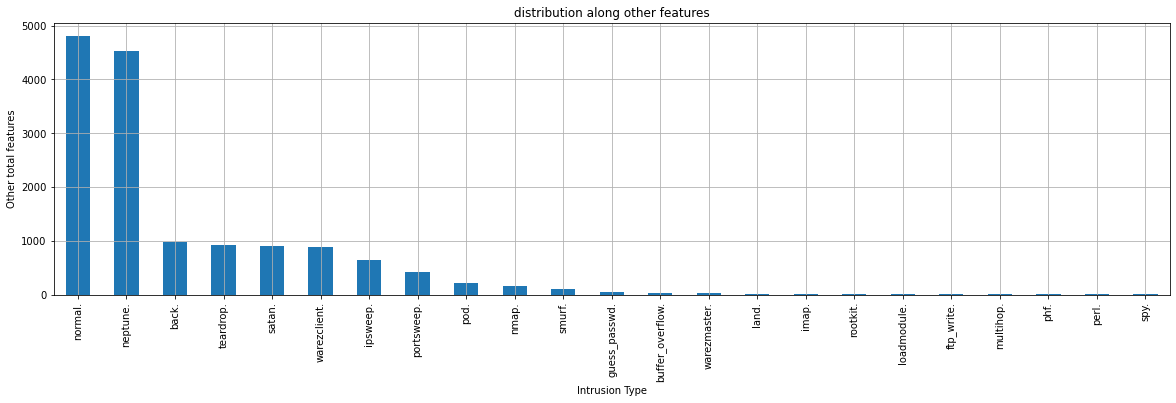

In [7]:
plt.figure(figsize=(20,5))
intrusion_type = df_kdd['label'].value_counts()
intrusion_type.plot(kind='bar')
plt.xlabel('Intrusion Type')
plt.ylabel('Other total features')
plt.title('distribution along other features')
plt.grid()
plt.show()

In [8]:
df_kdd[' land'].value_counts()

0    14704
1       19
Name:  land, dtype: int64

column ' land' should be supposed to be a binary column, so it should have values `0` or `1`. Hence we need to remove the remaining values.
Here we will be replacing rest with value `1`

In [9]:
# df_kdd[' land'].replace({2:0, 3:0, 4:0})
df_kdd[' land'] = np.where(df_kdd[' land']>1, 1, df_kdd[' land'])

In [10]:
df_kdd['label'].value_counts()

normal.             4813
neptune.            4521
back.                968
teardrop.            918
satan.               906
warezclient.         893
ipsweep.             651
portsweep.           416
pod.                 206
nmap.                158
smurf.                96
guess_passwd.         53
buffer_overflow.      30
warezmaster.          20
land.                 19
imap.                 12
rootkit.              10
loadmodule.            9
ftp_write.             8
multihop.              7
phf.                   4
perl.                  3
spy.                   2
Name: label, dtype: int64

In [11]:
df_kdd.isna().any()

duration                        False
 protocol_type                  False
 service                        False
 flag                           False
 src_bytes                      False
 dst_bytes                      False
 land                           False
 wrong_fragment                 False
 urgent                         False
 hot                            False
 num_failed_logins              False
 logged_in                      False
 num_compromised                False
 root_shell                     False
 su_attempted                   False
 num_root                       False
 num_file_creations             False
 num_shells                     False
 num_access_files               False
 num_outbound_cmds              False
 is_host_login                  False
 is_guest_login                 False
 count                          False
 srv_count                      False
 serror_rate                    False
 srv_serror_rate                False
 rerror_rate

In [12]:
df_kdd = df_kdd.apply(lambda x: x.fillna(x.value_counts().index[0]))
sum(df_kdd.isna().any())

0

In [13]:
cat_coulmns = [' protocol_type', ' service', ' flag']
new_df_kdd = df_kdd.copy()
df_categories = df_kdd[cat_coulmns].copy()

In [14]:
new_df_kdd['label'].unique()

array(['back.', 'buffer_overflow.', 'ftp_write.', 'guess_passwd.',
       'imap.', 'ipsweep.', 'land.', 'loadmodule.', 'multihop.',
       'neptune.', 'nmap.', 'normal.', 'perl.', 'phf.', 'pod.',
       'portsweep.', 'rootkit.', 'satan.', 'smurf.', 'spy.', 'teardrop.',
       'warezclient.', 'warezmaster.'], dtype=object)

In [15]:
label_encoder = LabelEncoder()
df_categories = df_categories.apply(label_encoder.fit_transform)
df_categories.head()

,protocol_type,service,flag
0,1,22,9
1,1,22,9
2,1,22,9
3,1,22,9
4,1,22,9


In [16]:
df_temp = df_categories.copy()
for i in [' protocol_type', ' service', ' flag']:
    y = pd.get_dummies(df_categories[i], prefix=i)
    df_temp = df_temp.join(y)
df_temp.drop(cat_coulmns, axis=1, inplace=True)
cat_coulmns.extend(['label', 'duration'])
new_df_kdd.drop(cat_coulmns, axis=1, inplace=True)
new_df_kdd = new_df_kdd.join(y)
print(new_df_kdd.head())

    src_bytes   dst_bytes   land   wrong_fragment   urgent   hot  \
0       54540        8314      0                0        0     2   
1       54540        8314      0                0        0     2   
2       54540        8314      0                0        0     2   
3       54540        8314      0                0        0     2   
4       54540        8314      0                0        0     2   

    num_failed_logins   logged_in   num_compromised   root_shell  ...  \
0                   0           1                 1            0  ...   
1                   0           1                 1            0  ...   
2                   0           1                 1            0  ...   
3                   0           1                 1            0  ...   
4                   0           1                 1            0  ...   

    flag_1   flag_2   flag_3   flag_4   flag_5   flag_6   flag_7   flag_8  \
0        0        0        0        0        0        0        0        0  

Remove coorelated data, Refer: https://stackabuse.com/applying-filter-methods-in-python-for-feature-selection/

In [17]:
cor_features = set()
cor_matrix = new_df_kdd.corr()
cor_threashold = 0.8
for i in range(len(cor_matrix.columns)):
    for j in range(i):
        if not abs(cor_matrix.iloc[i, j]) > cor_threashold:
            continue
        colname = cor_matrix.columns[i]
        cor_features.add(colname)
print(len(cor_features))
print(cor_features)

12
{' dst_host_serror_rate', ' srv_rerror_rate', ' dst_host_srv_rerror_rate', ' flag_5', ' srv_serror_rate', ' su_attempted', ' is_guest_login', ' flag_1', ' num_root', ' dst_host_rerror_rate', ' flag_9', ' dst_host_srv_serror_rate'}


Drop the coorelated features

In [18]:
new_df_kdd.drop(labels=cor_features, axis=1, inplace=True)

In [19]:
df_kdd['label'].value_counts()

normal.             4813
neptune.            4521
back.                968
teardrop.            918
satan.               906
warezclient.         893
ipsweep.             651
portsweep.           416
pod.                 206
nmap.                158
smurf.                96
guess_passwd.         53
buffer_overflow.      30
warezmaster.          20
land.                 19
imap.                 12
rootkit.              10
loadmodule.            9
ftp_write.             8
multihop.              7
phf.                   4
perl.                  3
spy.                   2
Name: label, dtype: int64

In [20]:
new_df_kdd_x = new_df_kdd.drop([' dst_bytes'],axis=1)
new_df_kdd_y = new_df_kdd.loc[:,' dst_bytes'].copy()

train_x, test_x, train_y, test_y = train_test_split(new_df_kdd_x, new_df_kdd_y, test_size=0.30, random_state=0)

In [21]:
clf = DecisionTreeClassifier(random_state=0)

rfe_selector = RFE(estimator=clf, n_features_to_select=12, step=1)
rfe_selector.fit_transform(train_x.astype(int), train_y.astype(int))
rfe_selected_features = []
for indx, val in enumerate(rfe_selector.support_):
    if val:
        rfe_selected_features.append(list(pd.DataFrame(train_x, columns=new_df_kdd_x.columns).columns)[indx])
print(f"RFE selected feature with DecisionTree Classifier are {rfe_selected_features} \n\n")

RFE selected feature with DecisionTree Classifier are [' src_bytes', ' hot', ' num_failed_logins', ' logged_in', ' num_compromised', ' count', ' srv_count', ' same_srv_rate', ' dst_host_count', ' dst_host_srv_count', ' dst_host_same_srv_rate', ' dst_host_same_src_port_rate'] 




In [22]:
train_x = StandardScaler().fit_transform(train_x[rfe_selected_features])
test_x = StandardScaler().fit_transform(test_x[rfe_selected_features])

In [23]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

In [24]:
pca = PCA(2)
 
#Transform the data
df = pd.DataFrame( pca.fit_transform(train_x))
 
df.shape

(10306, 2)

In [25]:
df.head()

,0,1
0,2.082876,-0.244732
1,2.342099,-0.206300
2,2.538324,-0.209638
3,-1.456927,2.674163
4,-1.873636,-0.520886


872
1486
496
550
205
3373
772
1494
432
626


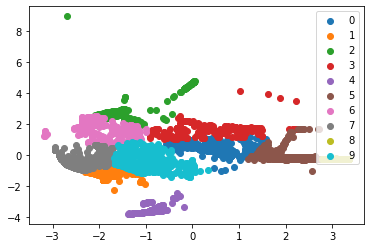

In [26]:
#Import KMeans module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 10)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
#     print(i)
    filtered_label0 = df[label == i]
    print(len(filtered_label0))
#     print(filtered_label0)
    plt.scatter(filtered_label0[0] , filtered_label0[1] , label = i)
plt.legend()
plt.show()

In [27]:
means=kmeans.cluster_centers_
print(means)

[[ 0.48098794  0.52875382]
 [-1.87948962 -1.26728923]
 [-1.43387972  2.85108382]
 [ 0.38391212  1.69329198]
 [-0.91433339 -3.50982719]
 [ 2.22190398 -0.16773151]
 [-2.19098978  1.81550846]
 [-2.38930794 -0.44687325]
 [ 3.31385589 -0.25729043]
 [-0.964464   -0.42961904]]


In [28]:
df_kdd['label'].value_counts()

normal.             4813
neptune.            4521
back.                968
teardrop.            918
satan.               906
warezclient.         893
ipsweep.             651
portsweep.           416
pod.                 206
nmap.                158
smurf.                96
guess_passwd.         53
buffer_overflow.      30
warezmaster.          20
land.                 19
imap.                 12
rootkit.              10
loadmodule.            9
ftp_write.             8
multihop.              7
phf.                   4
perl.                  3
spy.                   2
Name: label, dtype: int64

In [29]:
from sklearn.metrics import confusion_matrix,classification_report
print("ConfusionMatrix",confusion_matrix(pd.DataFrame(train_y),kmeans.labels_))
print(classification_report(pd.DataFrame(train_y),kmeans.labels_))

ConfusionMatrix [[814   0 464 ...   0   0   0]
 [  1   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   1 ...   0   0   0]
 [  0   0   1 ...   0   0   0]
 [  0   0   1 ...   0   0   0]]
              precision    recall  f1-score   support

           0       0.93      0.13      0.22      6392
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         2
          24       0.00      0.00      0.00         1
          26       0.00      0.00  

C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.

DBSCAN

In [30]:
df.head()

,0,1
0,2.082876,-0.244732
1,2.342099,-0.206300
2,2.538324,-0.209638
3,-1.456927,2.674163
4,-1.873636,-0.520886


In [31]:
# dbscan = DBSCAN(eps=30,min_samples=6).fit(df)
# df['labels'] = clustering_labels

dbscan = DBSCAN()
clustering_labels = dbscan.fit_predict(df)

In [32]:
df['labels'] = clustering_labels

In [33]:
df['P1'] = df[0]
df.drop(0, axis=1, inplace=True)
df['P2'] = df[1]
df.drop(1, axis=1, inplace=True)

In [34]:
# pd.DataFrame(labels)[0].value_counts()

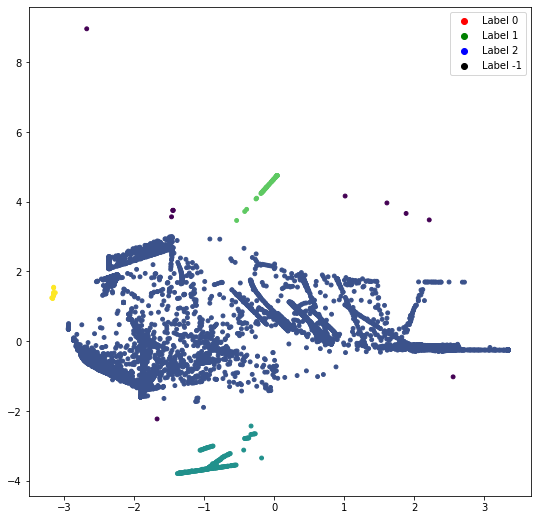

In [41]:
import matplotlib
# df.columns = ['P1', 'P2']
# Building the label to colour mapping
# colours = {}
# colours[0] = 'r'
# colours[1] = 'g'
# colours[2] = 'b'
# colours[-1] = 'k'
  
# # Building the colour vector for each data point
# cvec = [colours[label] for label in labels]
  
# For the construction of the legend of the plot
# r = plt.scatter(df['P1'], df['P2'], color ='r');
# g = plt.scatter(df['P1'], df['P2'], color ='g');
# b = plt.scatter(df['P1'], df['P2'], color ='b');
# k = plt.scatter(df['P1'], df['P2'], color ='k');
  
# Plotting P1 on the X-Axis and P2 on the Y-Axis 
# according to the colour vector defined
plt.figure(figsize =(9, 9))
plt.scatter(df['P1'], df['P2'], c=df['labels'],s=15)
  
# Building the legend
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))
  
plt.show()

In [42]:
from sklearn import metrics
metrics.silhouette_score(df, df['labels'])

0.2593740749150227

Refer: https://medium.com/@tarammullin/dbscan-2788cfce9389

In [43]:
dbscan = DBSCAN(eps=0.163, min_samples=5)
clustering_labels = dbscan.fit_predict(df)

In [44]:
df['labels'] = clustering_labels

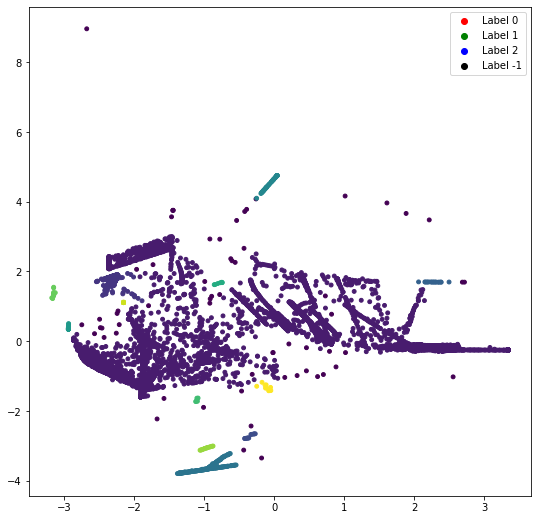

In [45]:
plt.figure(figsize =(9, 9))
plt.scatter(df['P1'], df['P2'], c=df['labels'],s=15)
  
# Building the legend
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))
  
plt.show()

In [46]:
metrics.silhouette_score(df, df['labels'])

0.14055717952691238